In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as stats

## 1) Creating graphs

### Method 1: From an empty graph by adding edges.

These functions are also convenient for editing a network, e.g. during some stochastic process in which the network is evolving. 

In [2]:
# Create an empty graph
G1 = nx.Graph()

# Add edges 
# (No need to add nodes explicity, it will do this automatically)
G1.add_edge(1,3)
G1.add_edge(2,3)
G1.add_edge(1,4)
G1.add_edge(3,4)

# But we could also add nodes 
G1.add_node(5)

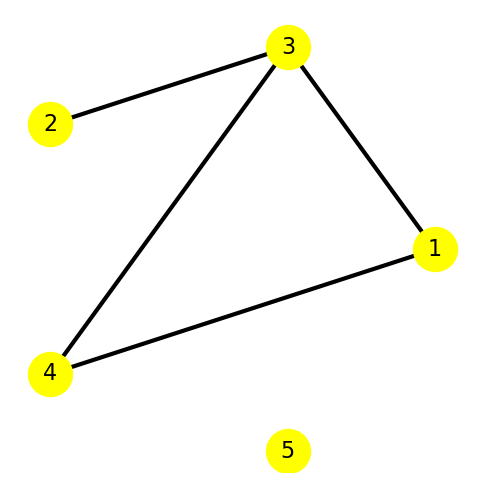

In [3]:
# Draw the network

# We define here a small function to draw a network to save some space 
def quick_draw(G):
    plt.figure(figsize = (6,6))

    pos = nx.circular_layout(G)

    nx.draw_networkx(G, 
                     pos = pos, 
                     with_labels = True, 
                     node_color = 'yellow',
                     node_size=1000, 
                     font_size=16, 
                     width=3) 
    plt.axis('off')
    
quick_draw(G1)

In [4]:
# We can give some basic properties of the network
N = nx.number_of_nodes(G1) # (len(G) also works)
M = G1.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 5
Number of edges: 4


In [5]:
# And also get the degree of each node
degrees = dict(G1.degree())
degrees = np.array(list(degrees.values()))
print('Nodes degrees = ', degrees)

Nodes degrees =  [2 3 1 2 0]


We can also write small functions to calculate degree distributions and shortest path matrices. Not very interesting for this graph but will be for bigger ones

In [6]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)        # store degree values in array
    
    maxk = np.max(vk)
    k = np.arange(0,maxk+1) # possible values of k
    
    pk = np.zeros(maxk+1) # degree distribution p(k)
    for i in vk:
        pk[i] = pk[i] + 1
    pk = pk/sum(pk) # the sum of the elements of P(k) must to be equal to one
    
    return k,pk

def deg_dist_moments(G,n):
    k,pk = degree_distribution(G)
    sol = sum((k**n)*pk)
    return sol

def shortest_path_matrix(G):
    D = np.zeros(shape=(len(G),len(G)))
    vl = [] #for the histogram below
    for i in np.arange(0,len(G)):
        for j in np.arange(i+1, len(G)):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux) - 1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    return D, vl

### Method 2 for making graphs: From a list of edges

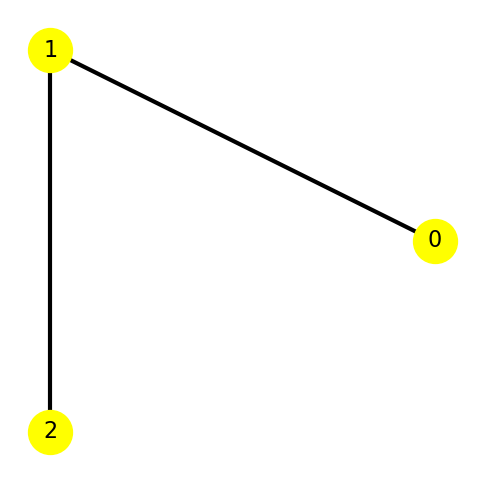

In [7]:
G2 = nx.Graph([(0,1),(1,2)])
quick_draw(G2)

### Combining graphs

Two main functions: 
1. Disjoint union - basically just puts the graphs next to eachother and renumbers the nodes.
2. Composition - edges that are common to both graphs are combined. 

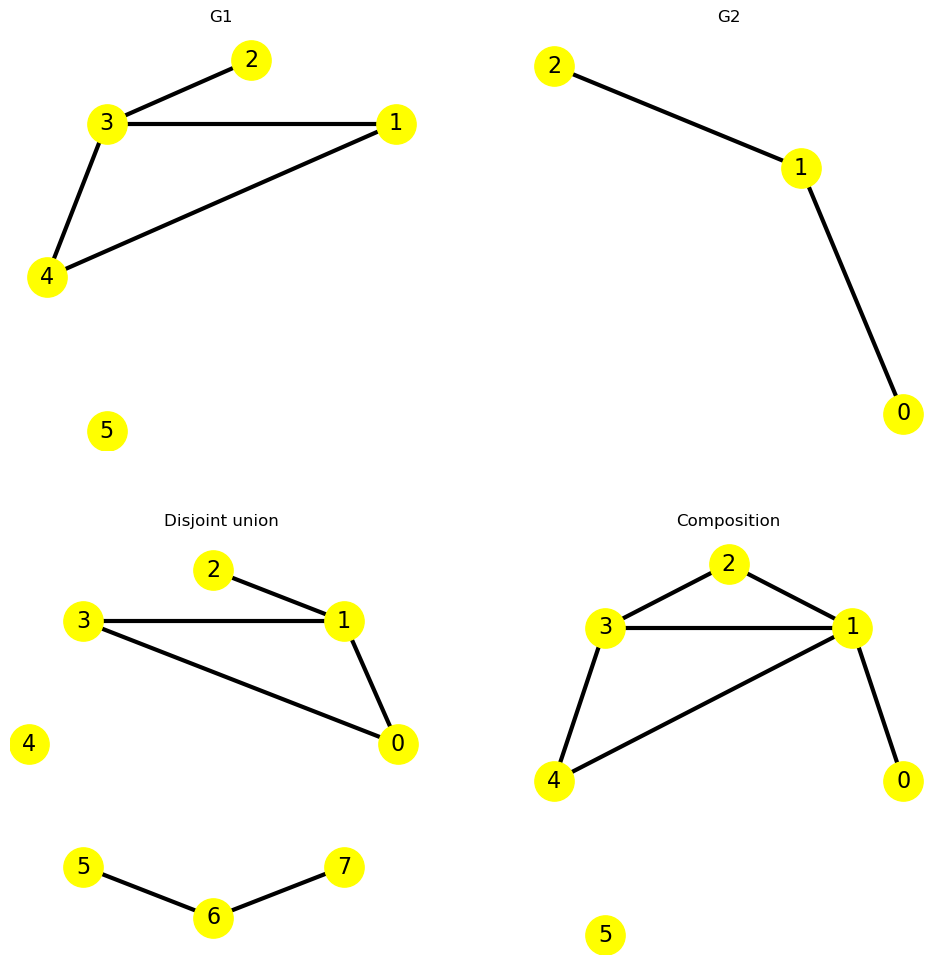

In [8]:
G3 = nx.disjoint_union(G1,G2)
G4 = nx.compose(G1,G2)

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,12))

graphs = {(0,0):G1,(0,1):G2,(1,0):G3,(1,1):G4}
names = {(0,0):'G1',(0,1):'G2',(1,0):'Disjoint union',(1,1):'Composition'}

for ax in graphs:
    plt.sca(axs[ax])
    nx.draw_networkx(
        graphs[ax], pos = nx.circular_layout(G3), with_labels = True, node_color = 'yellow',
        node_size=800, font_size=16, width=3) 
    plt.axis('off')
    plt.title(names[ax]);

## 2) Properties of graphs

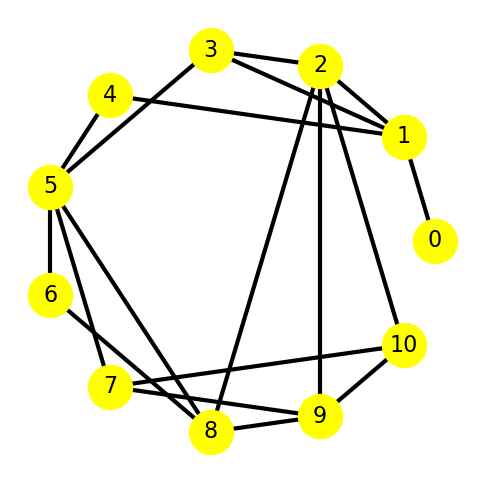

In [9]:
A = np.array([
    [0,1,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,1,1,1],
    [0,1,1,0,0,1,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,1,0,1,1,1,0,0],
    [0,0,0,0,0,1,0,0,1,0,0],
    [0,0,0,0,0,1,0,0,0,1,1],
    [0,0,1,0,0,1,1,0,0,1,0],
    [0,0,1,0,0,0,0,1,1,0,1],
    [0,0,1,0,0,0,0,1,0,1,0]])

G = nx.from_numpy_array(A)
quick_draw(G)

As there aren't many nodes the full degree distribution isn't very exciting, but we can calculate some moments.

In [10]:
k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = ", k1)
print("Second moment of the degree distribution = ", k2)
print("Degree variance = ", k2 - k1**2)

First moment of the degree distribution =  3.2727272727272725
Second moment of the degree distribution =  12.181818181818182
Degree variance =  1.471074380165291


Next we look at the shortest paths (geodesics).

Average shortest path length: 1.9090909090909092
Diameter (maximum shortest path) =  4


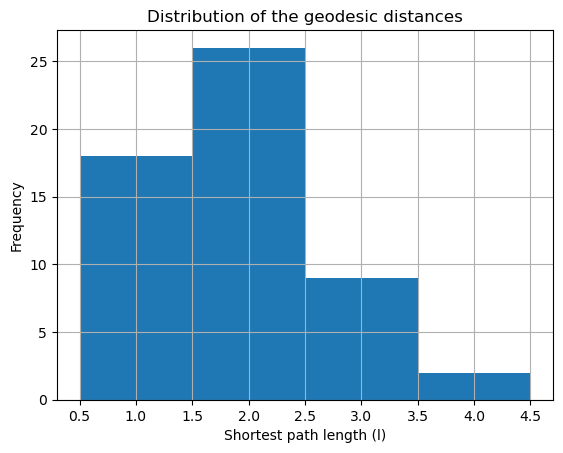

In [11]:
D, vl = shortest_path_matrix(G)

avg_D = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_D)

d = nx.diameter(G)
print('Diameter (maximum shortest path) = ', d)

# we can also produce a histogram of the shortest paths
plt.hist(vl, bins = np.arange(0.5,np.max(vl)+1))
plt.title("Distribution of the geodesic distances")
plt.ylabel("Frequency")
plt.xlabel("Shortest path length (l)")
plt.grid()
plt.show()

### Centrality 

There are lots of measures of node centrality, we demonstrate a few below (with some pretty plots of course).

In [12]:
Eigenvector = np.array([nx.eigenvector_centrality(G)[i] for i in range(len(G))])
Closeness = np.array([nx.closeness_centrality(G)[i] for i in range(len(G))])
Betweeness = np.array([nx.betweenness_centrality(G)[i] for i in range(len(G))])
Katz = np.array([nx.katz_centrality(G)[i] for i in range(len(G))])

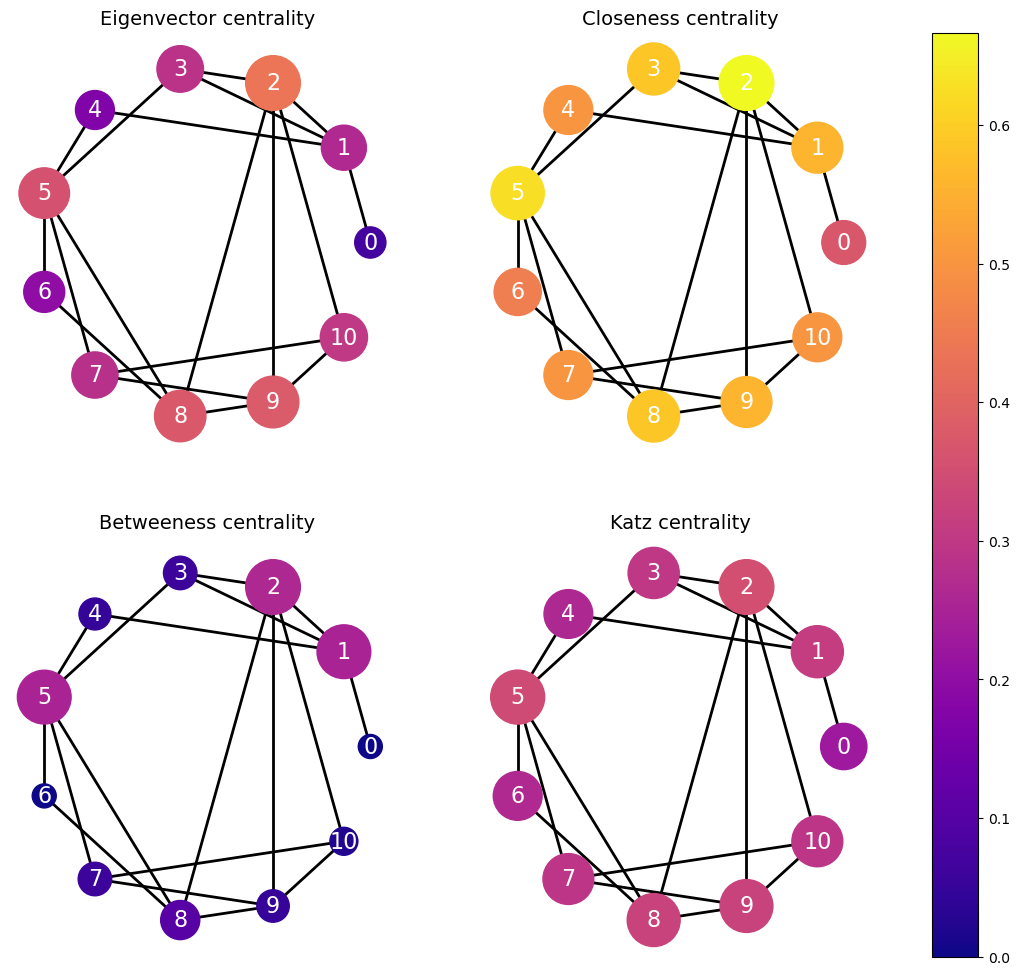

In [13]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (14,12))
color_by = {(0,0):Eigenvector,(0,1):Closeness,(1,0):Betweeness,(1,1):Katz}
name_by = {(0,0):'Eigenvector',(0,1):'Closeness',(1,0):'Betweeness',(1,1):'Katz'}

cmap = plt.cm.plasma
vmin = np.min([Eigenvector,Closeness,Betweeness,Katz]); vmax = np.max([Eigenvector,Closeness,Betweeness,Katz])

for ax in color_by:
    plt.sca(axs[ax])
    nx.draw_networkx(
        G, pos = nx.circular_layout(G), with_labels = True, node_color = color_by[ax], 
        vmin = vmin, vmax = vmax, cmap = cmap,
        node_size = 300 + 1250*color_by[ax]/max(color_by[ax]), font_size=16, width=2, font_color = 'white') 
    plt.axis('off')
    plt.title(f'{name_by[ax]} centrality',fontsize=14);
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
fig.colorbar(sm, ax=axs.ravel().tolist());

## 3) Erdos-Renyi graphs

We will use ER random graphs to demonstrate a few more things in the networkx package, as well as some nice features of the graphs themselves. 

### Connected components

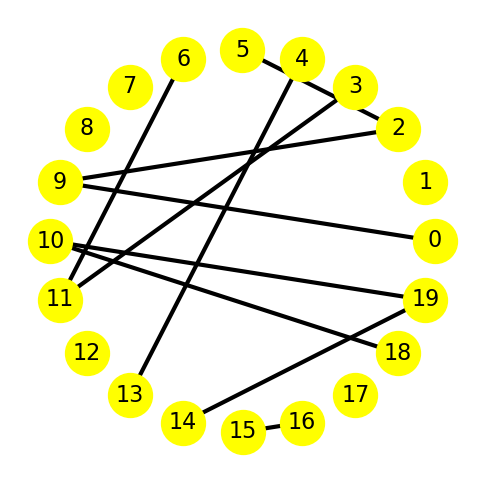

In [14]:
G5 = nx.erdos_renyi_graph(20,0.07)
quick_draw(G5)

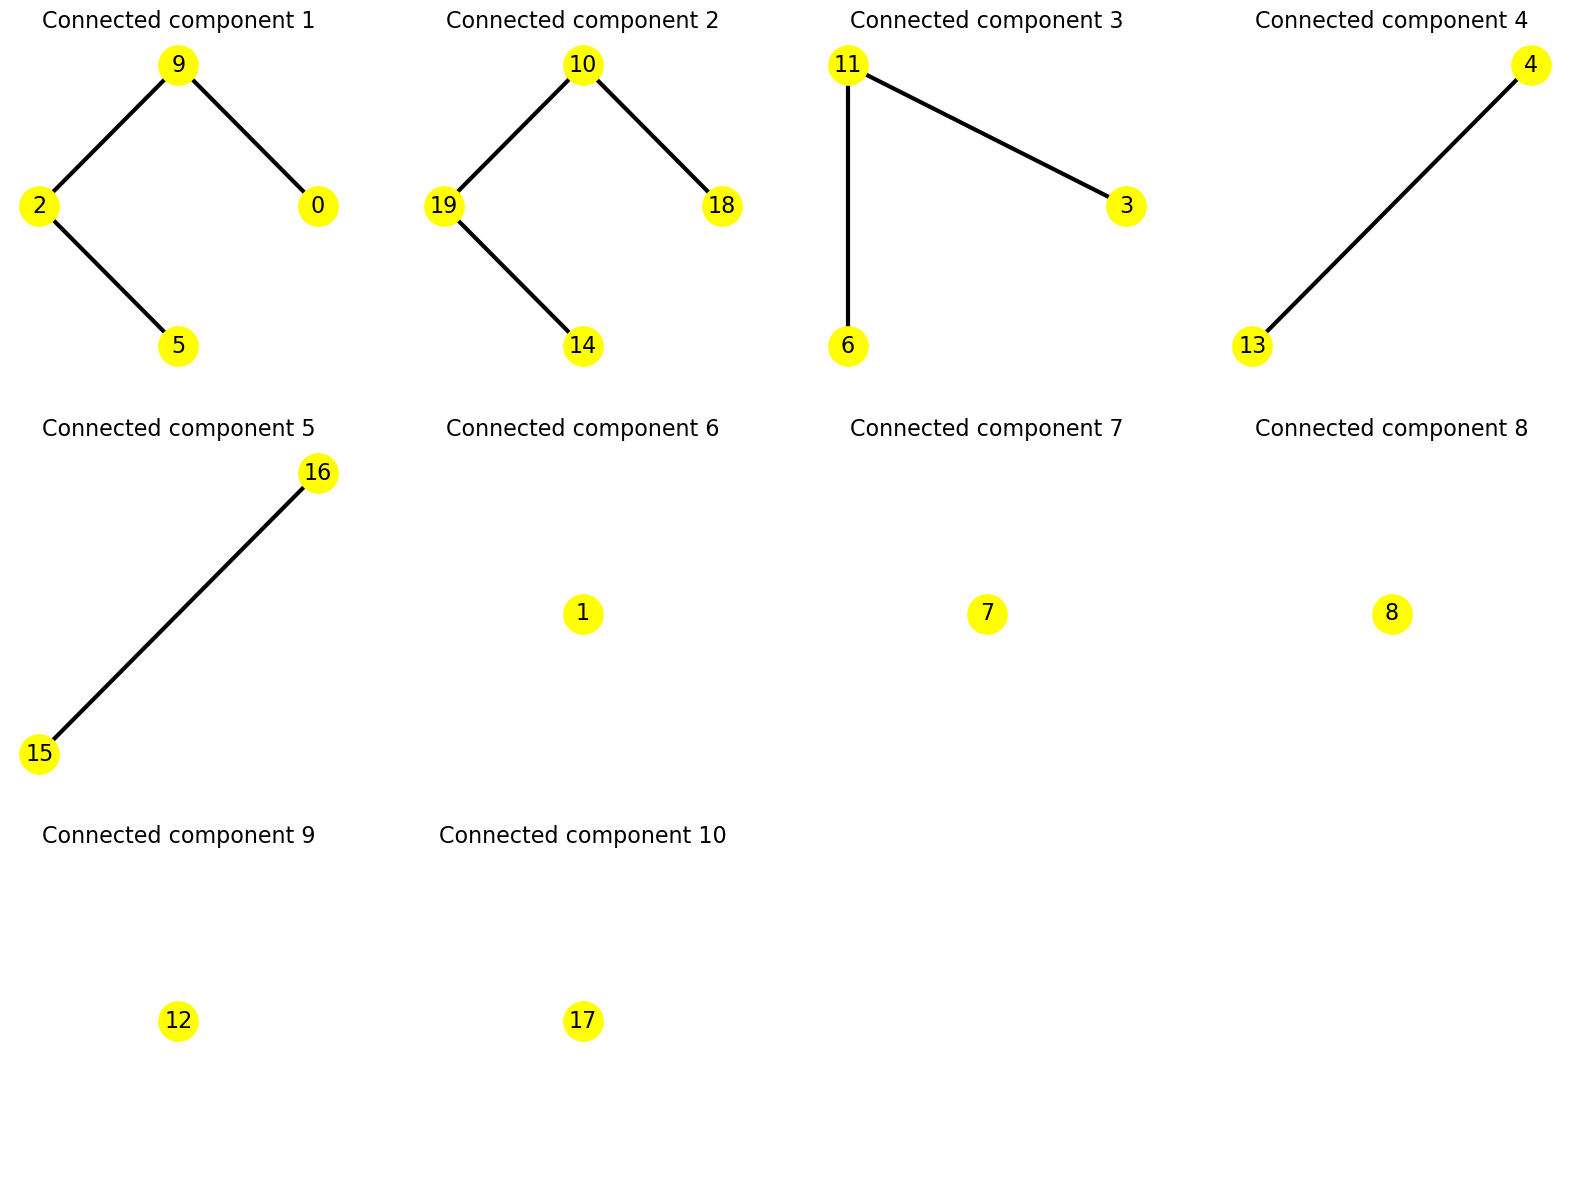

In [15]:
# Get the connected components as subgraphs (this bit is the actual work)
Gcc = sorted([G5.subgraph(c) for c in nx.connected_components(G5)], key = len, reverse=True)
number_cc = len(Gcc)

# The rest is all for plotting (although it is excessively general)

# Setup figure
m = min(number_cc,4) ; nrows = np.ceil(number_cc/m).astype(int); ncols = m
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols,5*nrows))

# Plot each subgraph
for cc in range(number_cc):
    if number_cc==1:
        plt.sca(axs)
    elif nrows == 1:
        plt.sca(axs[cc])
    else:
        plt.sca(axs[np.round((cc - cc%m)/m).astype(int),cc%m])
    nx.draw_networkx(
        Gcc[cc], pos = nx.circular_layout(Gcc[cc]), with_labels = True, node_color = 'yellow',
        node_size=800, font_size=16, width=3) 
    plt.axis('off')
    plt.title(f'Connected component {cc+1}', fontsize = 16)
for j in range(nrows*ncols - number_cc):
    i = nrows*ncols - j - 1
    if number_cc==1:
        plt.sca(axs)
    elif nrows == 1:
        plt.sca(axs[i])
    else:
        plt.sca(axs[np.round((i - i%m)/m).astype(int),i%m])
    plt.axis('off')

### Degree distributions

In [16]:
N = 2000
p = 30/N
G6 = nx.erdos_renyi_graph(N,p)

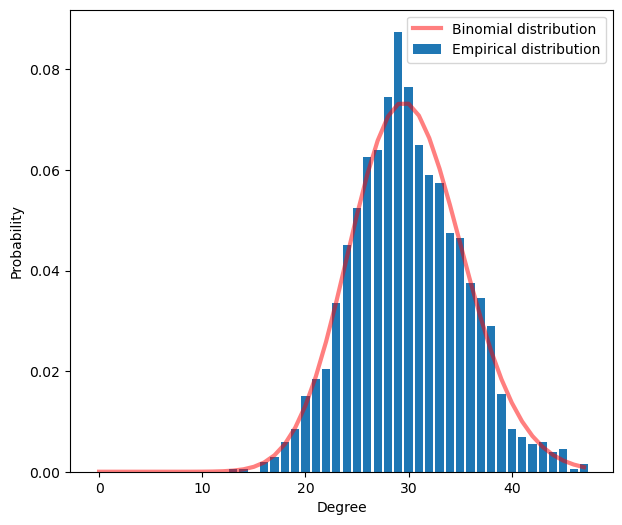

In [17]:
k, pk = degree_distribution(G6)

fig = plt.figure(figsize=(7,6))
plt.bar(k,pk,label = 'Empirical distribution')
plt.plot(k,binom.pmf(k,N,p),label = 'Binomial distribution', color = 'red', linewidth = 3, alpha = 0.5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.legend();

### Wigner semi-circle law

Spectrum of adjacency matrix $A$: set of eigenvalues of a matrix.

Plot eigenvalue against spectral density (and compare this to wigner semi-circle law).

Use `nx.to_numpy_matrix(G)` to get the adjacency matrix (in numpy format). There exists `nx.adjacency_matrix(G)` which creates a **sparse matrix** -- better for large data sets.

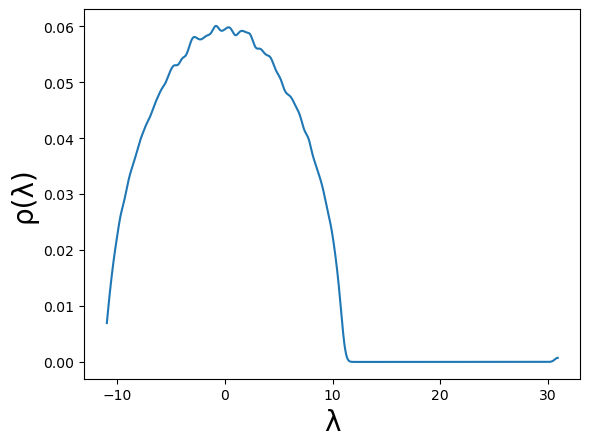

In [18]:
A6 = nx.to_numpy_matrix(G6)    #find adjacency matrix
evals, evecs = np.linalg.eig(A6)  #calculate e'vales

# find the spectral density using a kernel density estimate 
spectral_density = stats.gaussian_kde(evals, bw_method = 0.05)

#plot the density
λ = np.linspace(evals.min(), evals.max(), N)
plt.plot(λ, spectral_density(λ))
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20);

### 4) Something that looks cool

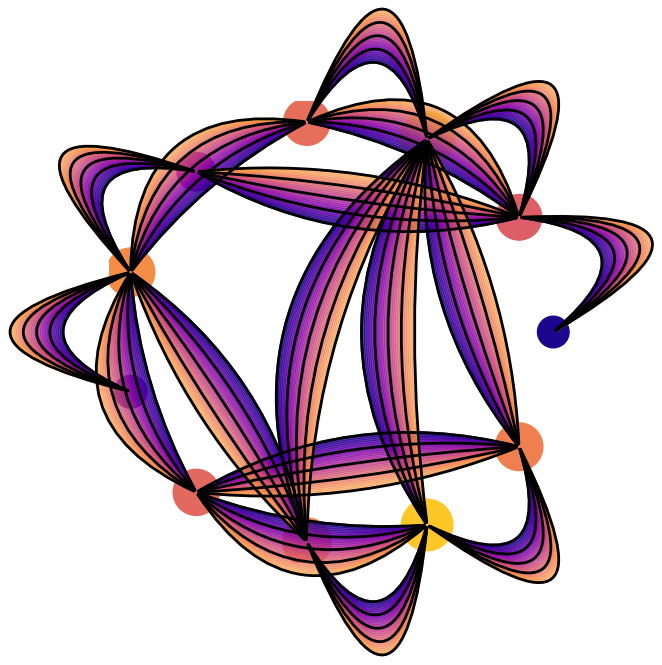

In [19]:
AA = np.array([
    [0,1,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,1,1,1],
    [0,1,1,0,0,1,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,1,0,1,1,1,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,1,1],
    [0,0,1,0,0,1,0,0,0,1,0],
    [0,0,1,0,0,0,0,1,1,0,1],
    [0,0,1,0,0,0,0,1,0,1,0]])
GG = nx.from_numpy_array(AA)

fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize = (6,6))
color_by = np.array([nx.eigenvector_centrality(GG)[i] for i in range(len(GG))])
cmap = plt.cm.plasma

vmin = np.min(Eigenvector); vmax = np.max(Eigenvector)
pos = nx.circular_layout(GG)

n = 30
V = np.linspace(1.2,1.7,n)
colors = np.linspace(0,0.8,n)

def alph(v):
    return 0.8*(max(V) - v/max(V))/(max(V) - min(V)/max(V))

for i in range(n):
    v = V[i]
    for edge in GG.edges():
        source, target = edge
        rad = -np.sign( np.cross(pos[source],pos[target]) ) *(-1 + v/np.linalg.norm(pos[source]-pos[target]) )
        arrowprops=dict(
            arrowstyle="-", connectionstyle=f"arc3,rad={rad}", zorder=3, linewidth=2, alpha = alph(v),
            color = cmap(colors[i]))
        plt.annotate("", xy=pos[source], xytext=pos[target], arrowprops=arrowprops)
        
n2 = 5
V2 = np.linspace(1.2,1.7,n2)

for i in range(n2):
    v = V2[i]
    for edge in GG.edges():
        source, target = edge
        rad = -np.sign( np.cross(pos[source],pos[target]) ) *(-1 + v/np.linalg.norm(pos[source]-pos[target]) )
        arrowprops=dict(
            arrowstyle="-", connectionstyle=f"arc3,rad={rad}", zorder=3, linewidth=2,
            color = 'black')
        plt.annotate("", xy=pos[source], xytext=pos[target], arrowprops=arrowprops)

nx.draw_networkx_nodes(
    GG, pos=pos, node_size=300 + 1250*color_by/max(color_by), 
    node_color=color_by, cmap = cmap, vmin = vmin, vmax = vmax)
plt.axis('off');

Remember to talk about properties of eigenvalues :) 